In [16]:
using RecipesBase, Plots, BentTool, StructuralUnits, Handcalcs

In [2]:
mutable struct MyType
    a
    b
end

m = MyType(
    [0.0, 40.0, 40.0, 0.0, 0.0],
    [0.0, 0.0, 8.5/12, 8.5/12, 0.0]
)

# @recipe f(::Type{MyType}, m::MyType) = Shape(m.a, m.b)
@recipe function f(m::MyType;)
    linecolor   --> :black
    seriestype  :=  :path
    fillcolor := :lightgrey
    legend := false


    # @series begin
    #     # force an argument with `:=`
    #     seriestype := :path
    #     # ignore series in legend and color cycling
    #     primary := false
    #     linecolor := nothing
    #     fillcolor := :lightgray
    #     fillalpha := 0.5
    #     # ensure no markers are shown for the error band
    #     markershape := :none
    #     # return series data
    #     Shape(m.a, m.b)
    # end
    s = Shape(m.a, m.b)
    translate!(s, 5)
end

In [3]:
using Plots

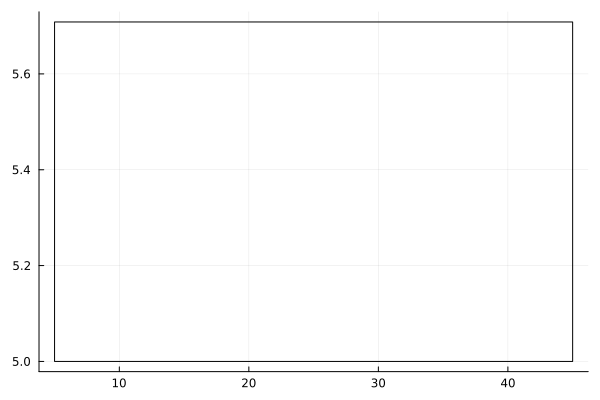

In [4]:
plot(m, c=:lightgrey)

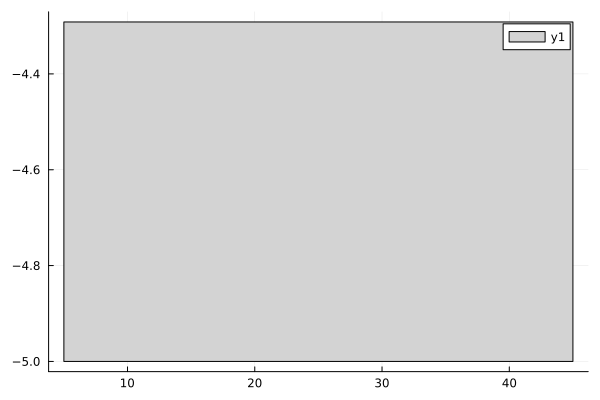

In [5]:
x = [0.0, 40.0, 40.0, 0.0, 0.0]
y = [0.0, 0.0, 8.5/12, 8.5/12, 0.0]
s = Shape(x, y)
translate!(s, 5, -5)
plot(s, c=:lightgrey)

In [6]:
plot(shapes)

UndefVarError: UndefVarError: `shapes` not defined

In [7]:
s = Slab(40)

Slab
  width: 40.0 ft
  thickness: 8.5 inch
  density: 0.15 kcf
  fws_thickness: 0.0 inch
  fws_density: 0.15 kcf
  cross_slope: 0.0

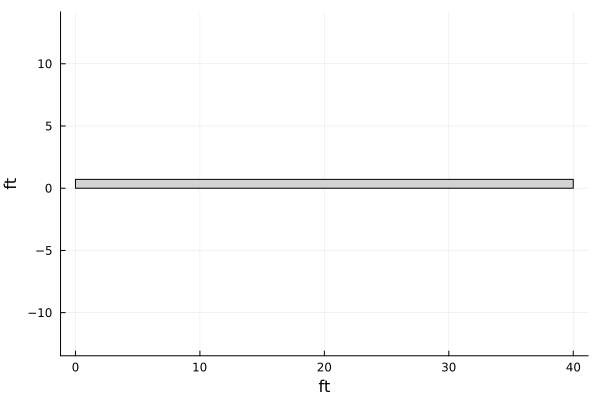

In [8]:
plot(s)

In [9]:
bk = init_simple_span(
       width=38.0ft,
       length = 100.0ft,
       girder_type = GirderType.Tx54,
       n_girders= 5,
       spacing = 8.0ft)

SimpleSpan
  slab: Slab
  width: 38.0 ft
  thickness: 8.5 inch
  density: 0.15 kcf
  fws_thickness: 0.0 inch
  fws_density: 0.15 kcf
  cross_slope: 0.0
  girder_info: GirderInfo
  girder: Tx54
  n_columns: 5
  spacing: [3.0 ft,8.0 ft,8.0 ft,8.0 ft,8.0 ft]
  brg: 3.0 ft wide x 2.75 inch tall
  pdstl: 3.333 ft wide x 1.5 inch tall

  length: 100.0 ft

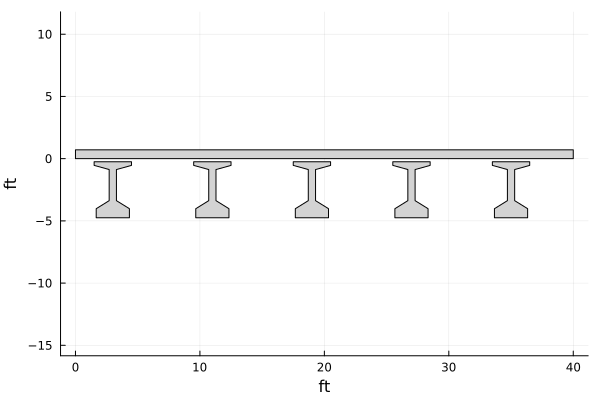

In [10]:
plot!(bk.girder_info)

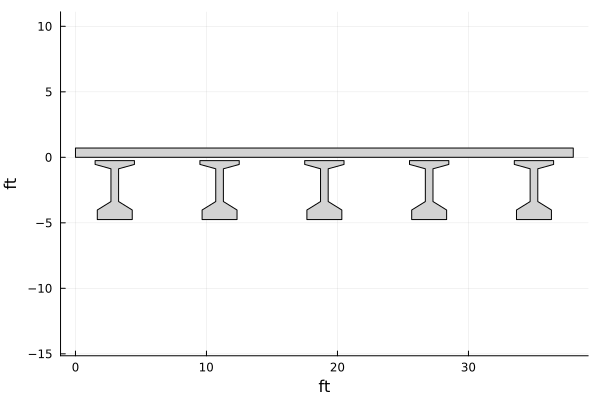

In [11]:
plot(bk)

In [12]:
function plot_h_dimensions!(
    xs::Vector{Vector{T}}, 
    ys::Vector{Vector{S}}; 
    error = 1, 
    lc = :black, 
    offset = zero(S),
    ) where T where S

    x_dims = middle.(xs)
    y_dims = middle.(ys)
    y_dims = y_dims .+ offset
    plot!(x_dims, y_dims; yerror=error, lc, ms=0inch, mc=lc)

    # plot annotations
    fntcm = "Courier"
    fntsz = 4
    x_lbls = find_midpoints(x_dims)
    y_lbls = find_midpoints(y_dims)
    spa = round.(T, find_spacing(x_dims), digits=2)
    annos = string.(spa)
    n = length.(annos)
    blanks = vcat("█".^n #=.* "█"=#)
    annotate!(x_lbls, y_lbls, text.(blanks,:white, #=fntcm,=# fntsz))
    annotate!(x_lbls, y_lbls, text.(annos, :black, #=fntcm,=# fntsz))
end

plot_h_dimensions! (generic function with 1 method)

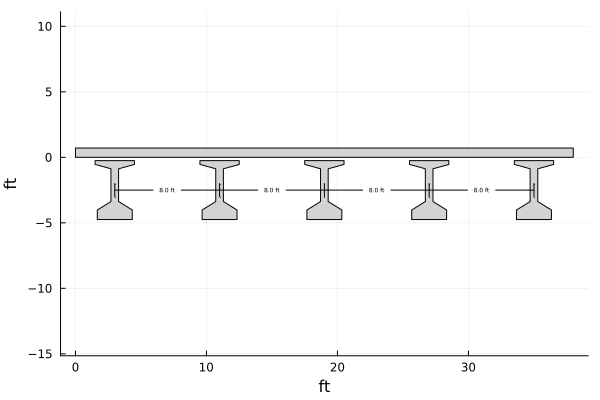

In [13]:
import BentTool: middle, find_midpoints, find_spacing
x, y = BentTool.points(bk.girder_info)
plot_h_dimensions!(x, y, error=0.5)